## 문제 설명
- 고객의 약관 동의를 얻어서 수집된 1~n번으로 분류되는 개인정보 n개가 있습니다. 약관 종류는 여러 가지 있으며 각 약관마다 개인정보 보관 유효기간이 정해져 있습니다. 당신은 각 개인정보가 어떤 약관으로 수집됐는지 알고 있습니다. 수집된 개인정보는 유효기간 전까지만 보관 가능하며, 유효기간이 지났다면 반드시 파기해야 합니다.

- 예를 들어, A라는 약관의 유효기간이 12 달이고, 2021년 1월 5일에 수집된 개인정보가 A약관으로 수집되었다면 해당 개인정보는 2022년 1월 4일까지 보관 가능하며 2022년 1월 5일부터 파기해야 할 개인정보입니다.
당신은 오늘 날짜로 파기해야 할 개인정보 번호들을 구하려 합니다.

#### 모든 달은 28일까지 있다고 가정합니다.

- 다음은 오늘 날짜가 2022.05.19일 때의 예시입니다.

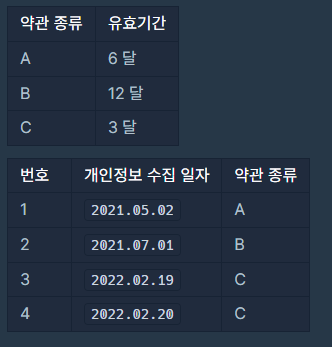

- 첫 번째 개인정보는 A약관에 의해 2021년 11월 1일까지 보관 가능하며, 유효기간이 지났으므로 파기해야 할 개인정보입니다.
- 두 번째 개인정보는 B약관에 의해 2022년 6월 28일까지 보관 가능하며, 유효기간이 지나지 않았으므로 아직 보관 가능합니다.
- 세 번째 개인정보는 C약관에 의해 2022년 5월 18일까지 보관 가능하며, 유효기간이 지났으므로 파기해야 할 개인정보입니다.
- 네 번째 개인정보는 C약관에 의해 2022년 5월 19일까지 보관 가능하며, 유효기간이 지나지 않았으므로 아직 보관 가능합니다.
- 따라서 파기해야 할 개인정보 번호는 [1, 3]입니다.

- 오늘 날짜를 의미하는 문자열 today, 약관의 유효기간을 담은 1차원 문자열 배열 terms와 수집된 개인정보의 정보를 담은 1차원 문자열 배열 privacies가 매개변수로 주어집니다. 이때 파기해야 할 개인정보의 번호를 오름차순으로 1차원 정수 배열에 담아 return 하도록 solution 함수를 완성해 주세요.

## 제한사항
- today는 "YYYY.MM.DD" 형태로 오늘 날짜를 나타냅니다.
- 1 ≤ terms의 길이 ≤ 20
    - terms의 원소는 "약관 종류 유효기간" 형태의 약관 종류와 유효기간을 공백 하나로 구분한 문자열입니다.
    - 약관 종류는 A~Z중 알파벳 대문자 하나이며, terms 배열에서 약관 종류는 중복되지 않습니다.
    - 유효기간은 개인정보를 보관할 수 있는 달 수를 나타내는 정수이며, 1 이상 100 이하입니다.
- 1 ≤ privacies의 길이 ≤ 100
    - privacies[i]는 i+1번 개인정보의 수집 일자와 약관 종류를 나타냅니다.
    - privacies의 원소는 "날짜 약관 종류" 형태의 날짜와 약관 종류를 공백 하나로 구분한 문자열입니다.
    - 날짜는 "YYYY.MM.DD" 형태의 개인정보가 수집된 날짜를 나타내며, today 이전의 날짜만 주어집니다.
    - privacies의 약관 종류는 항상 terms에 나타난 약관 종류만 주어집니다.
- today와 privacies에 등장하는 날짜의 YYYY는 연도, MM은 월, DD는 일을 나타내며 점(.) 하나로 구분되어 있습니다.
    - 2000 ≤ YYYY ≤ 2022
    - 1 ≤ MM ≤ 12
    - MM이 한 자릿수인 경우 앞에 0이 붙습니다.
    - 1 ≤ DD ≤ 28
    - DD가 한 자릿수인 경우 앞에 0이 붙습니다.
- 파기해야 할 개인정보가 하나 이상 존재하는 입력만 주어집니다.


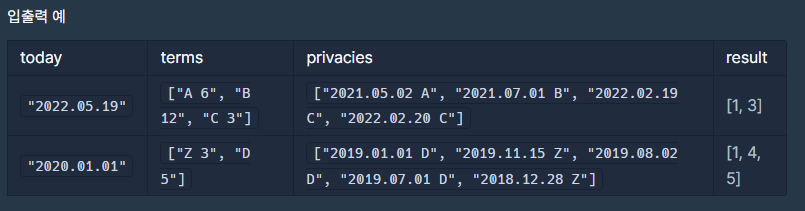

In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [9]:
today = "2022.05.19"
terms = ["A 6", "B 12", "C 3"]
privacies = ["2021.05.02 A", "2021.07.01 B", "2022.02.19 C", "2022.02.20 C"]
# 결과값은 [1,3]이 나와야한다.

In [10]:
def solution(today, terms, privacies):
    today = datetime.strptime(today,'%Y.%m.%d')
    terms_key = []
    terms_items = []
    for term in terms:
        terms_key.append(term[0])
        terms_items.append(term[2:])
    terms_dict = dict(zip(terms_key,terms_items))
    answer = []
    for i in range(len(privacies)):
        mon = int(terms_dict[privacies[i].split(' ')[1]])
        pre = datetime.strptime(privacies[i].split(' ')[0],'%Y.%m.%d')
        stop_day = pre + relativedelta(months=mon)
        # print(f'계약날자 : {pre}')
        # print(f'유효기간 : {mon}개월')
        # print(f'종료 날짜 : {stop_day}')
    
        if stop_day <= today:
            # print('파기')
            answer.append(i+1)
            
    return answer

In [11]:
solution(today, terms, privacies)

[1, 3]